## How to find out the outlier in dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## define out datasets

dataset = [12,12,11,13,10,13,10,14,15,11,10,12,11,14,12,107,14,11,108,12,12,105]

(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

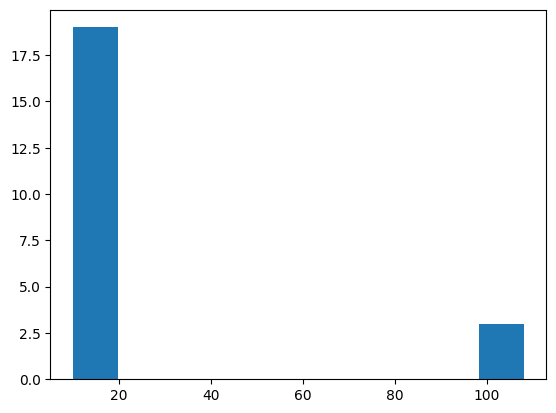

In [20]:
# this is a tricky way to find out outliers in dataset by using histogram

plt.hist(dataset)

### By using some code, z score

In [5]:
# Z-score

outliers = []
def detect_outliers(data):
    threshold=2  ## 3rd standard deviation
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [6]:
detect_outliers(dataset)

[107, 108, 105]

### By using IQR

## IQR

1. sort the data
2. calculate Q1(25%) and Q3(75%)
3. calculate IQR (Q3-Q1)
4. find lower fence = Q1-1.5(IQR)
5. find upper fence = Q3+1.5(IQR)

In [7]:
dataset

[12,
 12,
 11,
 13,
 10,
 13,
 10,
 14,
 15,
 11,
 10,
 12,
 11,
 14,
 12,
 107,
 14,
 11,
 108,
 12,
 12,
 105]

In [8]:
# sort

dataset = sorted(dataset)
print(dataset)

[10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 15, 105, 107, 108]


In [9]:
q1, q3= np.percentile(dataset, [25,75])

print(q1,q3)

11.0 14.0


In [10]:
iqr = (q3-q1)
print(iqr)

3.0


In [11]:
## find the lower and upper fence

lower_fence= q1-(1.5*iqr)
upper_fence= q3+(1.5*iqr)
print(lower_fence, upper_fence)

6.5 18.5


In [13]:
outliers = []

for i in dataset:
    if i < 6.5 or i > 18.5:
        if i not in outliers:  # Check if the value is not already in the list
            outliers.append(i)

print(outliers)


[105, 107, 108]


In [16]:
import seaborn as sns

<Axes: >

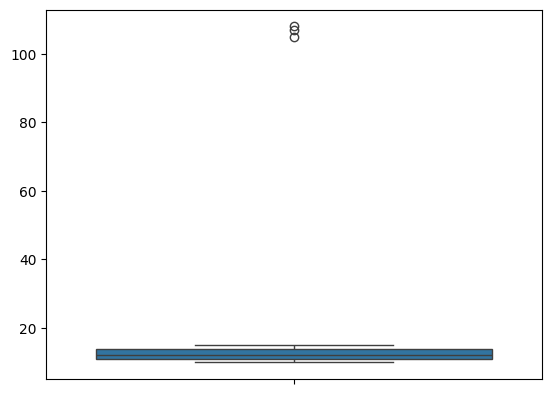

In [21]:
# to visualize the outliers in boxplot

sns.boxplot(dataset)